In [1]:
import os
import numpy as np
import librosa
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [12]:
file_path = 'train/song/0002.mp3'
audio, sample_rate = librosa.load(file_path)

In [48]:
def get_durations(folder_path):
    durations = []
    for file_ in tqdm(os.listdir(folder_path)):
        path = os.path.join(folder_path, file_)
        audio, sample_rate = librosa.load(path)
        durations.append(librosa.get_duration(y = audio, sr = sample_rate))
    return np.array(durations)

In [49]:
song_duration = get_durations('train/song/')

100%|███████████████████████████████████████| 2901/2901 [35:38<00:00,  1.36it/s]


100%|███████████████████████████████████████| 2901/2901 [18:10<00:00,  2.66it/s]


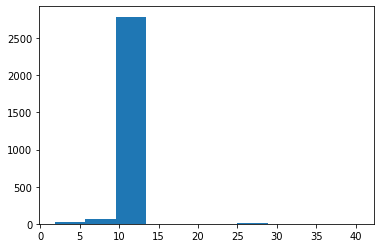

In [50]:
hum_duration = plot_histogram('train/hum')

In [52]:
#with open('song_durations.npy', 'wb') as file:
 #   np.save(file, song_duration)
#with open('hum_duration.npy', 'wb') as file:
 #   np.save(file, hum_duration)

In [2]:
with open('song_durations.npy', 'rb') as file:
    song_duration = np.load(file)
    
with open('hum_duration.npy', 'rb') as file:
    hum_duration = np.load(file)

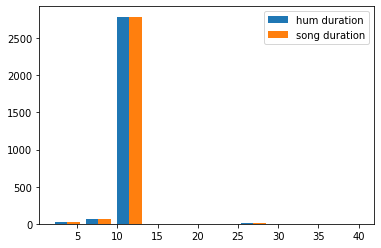

In [3]:
bins = np.linspace(0, 30, 5)

plt.hist([hum_duration, song_duration], label=['hum duration', 'song duration'])
plt.legend(loc='upper right')
plt.show()